## Load data

In [3]:
import numpy as np

from random_forest.train import load_data, get_metadata_columns
from pathlib import Path
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

print(Path(".").absolute())
base_dir = Path("..", "..", "..", "..", "data")
radiomics_file_name = "radiomics_features_2022_12_10_11_20_08.csv"
radiomics_train_file_name = f"train_{radiomics_file_name}"
radiomics_test_file_name = f"test_{radiomics_file_name}"

train_dataframe = load_data(Path(base_dir, radiomics_file_name))

train_dataframe = train_dataframe.drop(get_metadata_columns(train_dataframe), axis=1)


C:\Users\Lenovo\Desktop\meningioma_project\code\src\radiomic_features\random_forest\analysis


## PCA

In [28]:
from sklearn.decomposition import PCA


def do_scaling(x_dataframe: pd.DataFrame):
    standard_scaler = StandardScaler()
    x_dataframe_scaled = standard_scaler.fit_transform(x_dataframe)
    return pd.DataFrame(x_dataframe_scaled, index=x_dataframe.index, columns=x_dataframe.columns)


train_dataframe_scaled = do_scaling(train_dataframe.drop("label", axis=1))
pca = PCA(n_components=2)
pca.fit(train_dataframe_scaled)
transformed_values = pca.components_.T

print(f"Explained variance: {pca.explained_variance_ratio_}")

data = []
for group in [1, 2, 3]:
    df_group_idx = list(train_dataframe[train_dataframe['label'] == group].index)
    print(df_group_idx)
    trace = go.Scatter(x=transformed_values[df_group_idx, 0],
                       y=transformed_values[df_group_idx, 1],
                       mode='markers',
                       name=group)
    data.append(trace)

# Layout of the plot
layout = go.Layout(title='PCA')
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)


Explained variance: [0.38572948 0.16536156]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
[78, 79, 80, 81, 82, 83, 84, 87, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
[85, 86, 88, 92, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


'temp-plot.html'

## Correlation of features with label

In [4]:
import pandas as pd
import plotly.express as px

df = train_dataframe.corr()[["label"]]
# df = pd.concat([df] * 10000, axis=1)
# fig = px.imshow(df)
fig = px.bar(df.iloc[1:])
pyo.plot(fig)

'temp-plot.html'

## Correlations between vars distribution

In [12]:
df = train_dataframe.corr()
fig = px.histogram(np.reshape(df.to_numpy(), -1))
pyo.plot(fig)

'temp-plot.html'

## Visualize variance explained by PCA

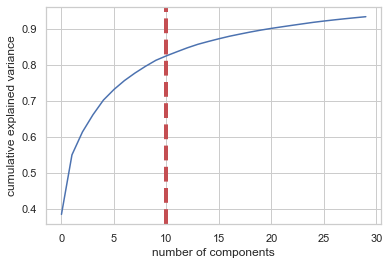

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.385299,0.385299
1,0.550494,0.165195
2,0.614068,0.063574
3,0.661717,0.047650
4,0.702572,0.040855
5,0.731868,0.029296
6,0.756622,0.024754
7,0.777467,0.020845
8,0.796139,0.018672
9,0.812983,0.016843


In [18]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

x_test_dataframe_scaled = do_scaling(train_dataframe)

pca = PCA(n_components=30)
pca.fit(x_test_dataframe_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle='--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))